# IMPORTS

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from urllib2 import urlopen
from bs4 import BeautifulSoup as bs
from datetime import datetime
import pandas as pd
from paretochart import pareto
import csv

# FUNÇÕES

In [3]:
def coordenadas (localizacao):
    mystring = localizacao.split(',')
    pos_latitude = mystring[0].split(' ')
    pos_longitude = mystring[1].split(' ')
    if pos_latitude[1] == 'N':
        latitude = float(pos_latitude[0])
    else:
        latitude = float(pos_latitude[0]) * -1
        
    if pos_longitude[2] == 'E':
        longitude = float(pos_longitude[1])
    else:
        longitude = float(pos_longitude[1]) * -1
        
    return latitude, longitude

def magicbox(magic_input):
    localizacao = magic_input[0]
    data_hora = datetime.strptime(magic_input[1], '%Y-%m-%d %H:%M:%S')
    magnitude = float(magic_input[2])
    latitude, longitude = coordenadas(magic_input[3])
    profundidade = float(magic_input[4].split(' ')[0])
    
    magic_output = [localizacao,data_hora,magnitude,latitude,longitude,profundidade]
    return magic_output

# SET UP

In [4]:
site = "http://rev.seis.sc.edu/earthquakes.html"
base_url = "http://rev.seis.sc.edu/earthquakes/?eq_url="
page = urlopen(site)

soup = bs(page, "html5lib")
options = soup.findAll("option")
print "Existem ",len(options)," terremotos registrados em rev.seis.sc.edu"

Existem  77  terremotos registrados em rev.seis.sc.edu


# COLETA DE DADOS

In [5]:
earthquakes = []
for option in options[:39]:
    myurl = base_url + option['value']
    soup = bs(urlopen(myurl), "html5lib")
    titems = soup.findAll('a', {'class': 'definition'})
    mylist = [option.find(text=True).split(',')[-2]]
    for i in range (1,5):
        mylist.append(titems[i].parent.findNext().findNext().find(text=True))
    earthquakes.append(magicbox(mylist))

In [18]:
myquakes = earthquakes[1:39]
print "Foram escolhidos os seguintes terremotos(%s):\n" % len(myquakes)
print '%s %20s %9s %10s %8s %10s' % ('Data/hora',"Mag.",'Lat.','Long.','Prof.','Local')
for quake in myquakes:
    for item in quake[1:]:
        print '%9s' % item,
    print "%15s" % quake[0],
    print ''

Foram escolhidos os seguintes terremotos(38):

Data/hora                 Mag.      Lat.      Long.    Prof.      Local
2016-10-21 20:47:39       3.5      36.4     -98.8       5.0        Oklahoma 
2016-10-21 20:26:00       4.0      36.4     -98.8       2.1        Oklahoma 
2016-10-21 19:51:16       4.6      14.4     -91.4      98.0       Guatemala 
2016-10-21 05:07:23       6.6      35.4     133.8       6.4           Japan 
2016-10-21 04:56:47       3.5      67.8    -146.1      10.0          Alaska 
2016-10-20 19:08:09       3.6      59.8    -152.7      87.0          Alaska 
2016-10-20 15:21:16       4.6      17.6     -94.6     139.0          Mexico 
2016-10-20 15:13:14       4.6      14.7     -91.6     105.0       Guatemala 
2016-10-20 13:28:01       3.6      35.2    -107.4       5.0      New Mexico 
2016-10-20 12:14:08       3.6      36.9     -97.6       3.9          Kansas 
2016-10-20 07:59:30       4.0      54.3    -161.7      29.0          Alaska 
2016-10-19 22:33:35       3.5     

CÁLCULOS

In [7]:
datas = []
ocorrencias = []
for quake in myquakes:
    data = quake[1].date()
    if not data in datas:
        datas.append(data)
        ocorrencias.append(1)
    else:
        index = datas.index(data)
        ocorrencias[index] += 1

# TERREMOTOS POR DIA

In [22]:
print 'media da quantidade de terremotos por dia: ',sum(ocorrencias)/float(len(ocorrencias))
print 'O rol da qtd. terremotos/dia é:'
for i in sorted(ocorrencias):
    print i,' ',
print ''
print 'onde a mediana é 3 e a moda é 3.'

media da quantidade de terremotos por dia:  3.16666666667
O rol da qtd. terremotos/dia é:
1   2   2   2   3   3   3   3   4   4   5   6   
onde a mediana é 3 e a moda é 3.


<table>
<tr>
<th>Data</th><th>Quantidade</th>
</tr>
<tr><td> 2016-10-21 </td><td> 5 </td></tr>
<tr><td> 2016-10-20 </td><td> 6 </td></tr>
<tr><td> 2016-10-19 </td><td> 3 </td></tr>
<tr><td> 2016-10-18 </td><td> 4 </td></tr>
<tr><td> 2016-10-17 </td><td> 3 </td></tr>
<tr><td> 2016-10-15 </td><td> 2 </td></tr>
<tr><td> 2016-10-14 </td><td> 1 </td></tr>
<tr><td> 2016-10-13 </td><td> 3 </td></tr>
<tr><td> 2016-10-12 </td><td> 2 </td></tr>
<tr><td> 2016-10-10 </td><td> 3 </td></tr>
<tr><td> 2016-10-09 </td><td> 4 </td></tr>
<tr><td> 2016-10-08 </td><td> 2 </td></tr>
</table>

MAGNITUDES

In [31]:
magnitudes = [quake[2] for quake in myquakes]
media_mag = sum(magnitudes)/float(len(magnitudes))
print 'a media das magnitudes é ',media_mag
print 'O rol das magnitudes é:\n'
lista_magnitudes = sorted(magnitudes)
for magnitude in lista_magnitudes:
    print magnitude,' ',
mag1 = lista_magnitudes[len(magnitudes)/2]
mag2 = lista_magnitudes[len(magnitudes)/2 - 1]

print '\n\nonde a mediana ou segundo quartil é %s e a moda é 3.5.' % ((mag1+mag2)/2)

metade1 = lista_magnitudes[:19]
metade2 = lista_magnitudes[19:]
print 'O primeiro quartil é %s' % (metade1[len(metade1)/2])
print 'O terceiro quartil é %s' % (metade2[len(metade2)/2])

a media das magnitudes é  4.43789473684
O rol das magnitudes é:

3.5   3.5   3.5   3.5   3.5   3.5   3.5   3.6   3.6   3.6   3.6   3.6   3.7   3.7   3.7   3.74   3.8   3.8   3.9   4.0   4.0   4.0   4.1   4.1   4.6   4.6   4.6   5.1   5.5   5.7   5.7   5.8   5.9   6.0   6.2   6.4   6.6   6.9   

onde a mediana ou segundo quartil é 3.95 e a moda é 3.5.
O primeiro quartil é 3.6
O terceiro quartil é 5.5


19

Gráfico: num. de terremotos/dia X data


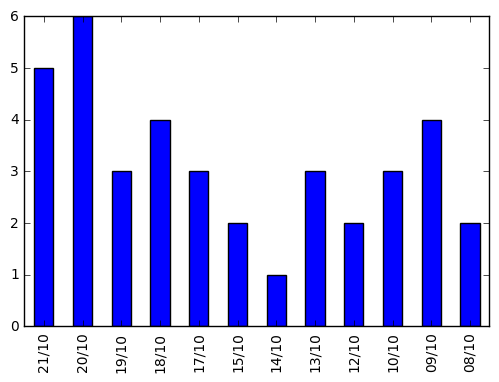

In [10]:
mes_dia = [data.strftime("%d/%m") for data in datas]
ser = pd.Series(ocorrencias, index=mes_dia)
print 'Gráfico: num. de terremotos/dia X data'
ax1 = ser.plot(kind='bar')

Diagrama de Pareto para as quantidades de terremoto por dia
Os dias são todos do mês de outubro de 2016


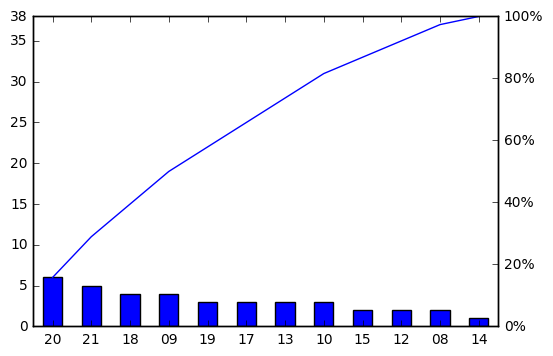

In [11]:
dias = [data.strftime("%d") for data in datas]
print 'Diagrama de Pareto para as quantidades de terremoto por dia'
pareto(ocorrencias,dias,data_kw={'width': 0.5,
    'color': 'b'})
print "Os dias são todos do mês de outubro de 2016"

<table>
<tr>
<th>LOCAL</th><th>DATA</th><th>MAGNITUDE</th><th>LATITUDE</th><th>LONGITUDE</th><th>PROFUNDIDADE</th>
</tr>
<tr>
<td>  Oklahoma </td>
<td> 2016-10-21 </td>
<td> 3.5 </td>
<td> 36.4 </td>
<td> -98.8 </td>
<td> 5.0 </td>
</tr>
<tr>
<td>  Oklahoma </td>
<td> 2016-10-21 </td>
<td> 4.0 </td>
<td> 36.4 </td>
<td> -98.8 </td>
<td> 2.1 </td>
</tr>
<tr>
<td>  Guatemala </td>
<td> 2016-10-21 </td>
<td> 4.6 </td>
<td> 14.4 </td>
<td> -91.4 </td>
<td> 98.0 </td>
</tr>
<tr>
<td>  Japan </td>
<td> 2016-10-21 </td>
<td> 6.6 </td>
<td> 35.4 </td>
<td> 133.8 </td>
<td> 6.4 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-21 </td>
<td> 3.5 </td>
<td> 67.8 </td>
<td> -146.1 </td>
<td> 10.0 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-20 </td>
<td> 3.6 </td>
<td> 59.8 </td>
<td> -152.7 </td>
<td> 87.0 </td>
</tr>
<tr>
<td>  Mexico </td>
<td> 2016-10-20 </td>
<td> 4.6 </td>
<td> 17.6 </td>
<td> -94.6 </td>
<td> 139.0 </td>
</tr>
<tr>
<td>  Guatemala </td>
<td> 2016-10-20 </td>
<td> 4.6 </td>
<td> 14.7 </td>
<td> -91.6 </td>
<td> 105.0 </td>
</tr>
<tr>
<td>  New Mexico </td>
<td> 2016-10-20 </td>
<td> 3.6 </td>
<td> 35.2 </td>
<td> -107.4 </td>
<td> 5.0 </td>
</tr>
<tr>
<td>  Kansas </td>
<td> 2016-10-20 </td>
<td> 3.6 </td>
<td> 36.9 </td>
<td> -97.6 </td>
<td> 3.9 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-20 </td>
<td> 4.0 </td>
<td> 54.3 </td>
<td> -161.7 </td>
<td> 29.0 </td>
</tr>
<tr>
<td>  Oklahoma </td>
<td> 2016-10-19 </td>
<td> 3.5 </td>
<td> 36.8 </td>
<td> -97.8 </td>
<td> 1.2 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-19 </td>
<td> 3.7 </td>
<td> 57.0 </td>
<td> -155.2 </td>
<td> 65.0 </td>
</tr>
<tr>
<td>  Indonesia </td>
<td> 2016-10-19 </td>
<td> 6.2 </td>
<td> -4.9 </td>
<td> 108.2 </td>
<td> 623.0 </td>
</tr>
<tr>
<td>  Dominican Republic </td>
<td> 2016-10-18 </td>
<td> 3.5 </td>
<td> 18.0 </td>
<td> -68.5 </td>
<td> 87.0 </td>
</tr>
<tr>
<td>  Dominica </td>
<td> 2016-10-18 </td>
<td> 5.8 </td>
<td> 15.2 </td>
<td> -61.5 </td>
<td> 148.0 </td>
</tr>
<tr>
<td>  South of the Fiji Islands </td>
<td> 2016-10-18 </td>
<td> 5.9 </td>
<td> -23.3 </td>
<td> -179.9 </td>
<td> 548.0 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-18 </td>
<td> 3.5 </td>
<td> 61.0 </td>
<td> -147.5 </td>
<td> 16.0 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-17 </td>
<td> 3.7 </td>
<td> 59.9 </td>
<td> -153.0 </td>
<td> 94.0 </td>
</tr>
<tr>
<td>  China </td>
<td> 2016-10-17 </td>
<td> 6.4 </td>
<td> 32.9 </td>
<td> 94.9 </td>
<td> 32.0 </td>
</tr>
<tr>
<td>  Papua New Guinea </td>
<td> 2016-10-17 </td>
<td> 6.9 </td>
<td> -6.1 </td>
<td> 148.9 </td>
<td> 35.0 </td>
</tr>
<tr>
<td>  Greece </td>
<td> 2016-10-15 </td>
<td> 5.5 </td>
<td> 39.8 </td>
<td> 20.7 </td>
<td> 21.0 </td>
</tr>
<tr>
<td>  Papua New Guinea </td>
<td> 2016-10-15 </td>
<td> 6.0 </td>
<td> -4.3 </td>
<td> 150.4 </td>
<td> 451.0 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-14 </td>
<td> 4.0 </td>
<td> 59.8 </td>
<td> -151.8 </td>
<td> 69.0 </td>
</tr>
<tr>
<td>  Canada </td>
<td> 2016-10-13 </td>
<td> 4.1 </td>
<td> 62.8 </td>
<td> -124.9 </td>
<td> 10.0 </td>
</tr>
<tr>
<td>  Mexico </td>
<td> 2016-10-13 </td>
<td> 5.1 </td>
<td> 25.5 </td>
<td> -109.8 </td>
<td> 20.0 </td>
</tr>
<tr>
<td>  Oklahoma </td>
<td> 2016-10-13 </td>
<td> 3.6 </td>
<td> 36.8 </td>
<td> -98.3 </td>
<td> 8.9 </td>
</tr>
<tr>
<td>  Papua New Guinea </td>
<td> 2016-10-12 </td>
<td> 5.7 </td>
<td> -5.4 </td>
<td> 153.5 </td>
<td> 22.0 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-12 </td>
<td> 3.9 </td>
<td> 65.7 </td>
<td> -145.2 </td>
<td> 15.0 </td>
</tr>
<tr>
<td>  Oklahoma </td>
<td> 2016-10-10 </td>
<td> 3.5 </td>
<td> 36.4 </td>
<td> -96.9 </td>
<td> 5.0 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-10 </td>
<td> 3.8 </td>
<td> 60.2 </td>
<td> -153.8 </td>
<td> 184.0 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-10 </td>
<td> 3.7 </td>
<td> 59.1 </td>
<td> -152.3 </td>
<td> 52.0 </td>
</tr>
<tr>
<td>  Indonesia </td>
<td> 2016-10-09 </td>
<td> 5.7 </td>
<td> 1.8 </td>
<td> 127.5 </td>
<td> 137.0 </td>
</tr>
<tr>
<td>  Oklahoma </td>
<td> 2016-10-09 </td>
<td> 3.8 </td>
<td> 36.4 </td>
<td> -96.9 </td>
<td> 5.1 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-09 </td>
<td> 3.5 </td>
<td> 65.8 </td>
<td> -144.8 </td>
<td> 15.0 </td>
</tr>
<tr>
<td>  Canada </td>
<td> 2016-10-09 </td>
<td> 4.1 </td>
<td> 64.7 </td>
<td> -132.8 </td>
<td> 11.0 </td>
</tr>
<tr>
<td>  CA </td>
<td> 2016-10-08 </td>
<td> 3.74 </td>
<td> 34.0 </td>
<td> -117.3 </td>
<td> 14.0 </td>
</tr>
<tr>
<td>  Alaska </td>
<td> 2016-10-08 </td>
<td> 3.6 </td>
<td> 62.3 </td>
<td> -151.3 </td>
<td> 2.4 </td>
</tr>
</table>